In [13]:
from data_processing.Data_Cleaning_Classes import CleanFifa as dff
from data_processing.Data_Cleaning_Classes import CleanCovid as dfc
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics, model_selection
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [14]:
covid = dfc().fetcher()
fifa = dff().fetcher()

# PRIMEIRA ANALISE DO FIFA
### Ordenando os valores e agroupando
 Agrupamos por time e ordenamos em ordem decrescente para descobrirmos os times no topo e no final em relação ao aproveitamento de pênaltis.

In [15]:
fifa_penalties_club = fifa.groupby(["Club"]).mean()
fifa_penalties_club = fifa_penalties_club.sort_values(by = "Penalties", ascending = False)

### Agora que sabemos os times no topo e no final da tabela de pênaltis, podemos filtrar cada um; fifa_mp para Melhor Pênalti e fifa_pp para Pior Pênalti.

In [16]:
fifa_mp = fifa[fifa["Club"].isin(["Grêmio", "Internacional","FC Schalke 04", "Besiktas JK", "Atlético Mineiro"])]
fifa_pp = fifa[fifa["Club"].isin(["IF Brommapojkarna", "FC Nordsjælland","Trelleborgs FF", "Bray Wanderers", "Derry City"])]

AttributeError: 'tuple' object has no attribute 'get_figure'

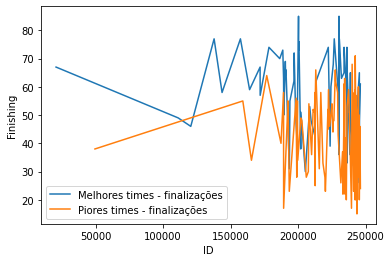

In [17]:
fig_errada = sns.lineplot(x = fifa_mp["ID"], y =fifa_mp["Finishing"], label = "Melhores times - finalizações"), sns.lineplot(x = fifa_pp["ID"], y =fifa_pp["Finishing"], label = "Piores times - finalizações")
figura = fig_errada.get_figure()
figura.savefig("ErradoPenalti-Finalizacao.png", dpi = 400)

## Devemos criar e deletar as colunas de ID pois quando re-organizamos segundo cada atributo, devemos mudar os valores do ID; ex: a ordem de ID com atributo Curve é diferente do Strength, por exemplo.
### FINALIZAÇÃO por time - melhor aproveitamento e pior

In [6]:
fifa_mp= fifa_mp.sort_values(by = "Finishing")
fifa_pp= fifa_pp.sort_values(by = "Finishing")
fifa_mp["ID"] = range(len(fifa_mp["Name"]))
fifa_pp["ID"] = range(len(fifa_pp["Name"]))
fig1 = sns.lineplot(x = fifa_mp["ID"], y =fifa_mp["Finishing"], label = "Melhores times - finalizações"), sns.lineplot(x = fifa_pp["ID"], y =fifa_pp["Finishing"], label = "Piores times - finalizações")
figura = fig1.get_figure()
figura.savefig("Finalizacao.png", dpi = 400)
del fifa_mp["ID"]
del fifa_pp["ID"]

## CURVA por time - melhor aproveitamento e pior

In [12]:
fifa_mp= fifa_mp.sort_values(by = "Curve")
fifa_pp= fifa_pp.sort_values(by = "Curve")
fifa_mp["ID"] = range(len(fifa_mp["Name"]))
fifa_pp["ID"] = range(len(fifa_pp["Name"]))
fig2 = sns.lineplot(x = fifa_mp["ID"], y =fifa_mp["Curve"],label = "Melhores times - curvatura do chute"), sns.lineplot(x = fifa_pp["ID"], y =fifa_pp["Curve"],label = "Piores times - curvatura do chute")
figura = fig2.get_figure()
fig2.savefig("Curvatura.png", dpi = 400)
del fifa_mp["ID"]
del fifa_pp["ID"]

## FORÇA por time - melhor aproveitamento e pior

In [8]:
fifa_mp= fifa_mp.sort_values(by = "Strength")
fifa_pp= fifa_pp.sort_values(by = "Strength")
fifa_mp["ID"] = range(len(fifa_mp["Name"]))
fifa_pp["ID"] = range(len(fifa_pp["Name"]))
fig3 = sns.lineplot(x = fifa_mp["ID"], y =fifa_mp["Strength"],label = "Melhores times - força do chute"), sns.lineplot(x = fifa_pp["ID"], y =fifa_pp["Strength"],label = "Piores times - força do chute")
figura = fig3.get_figure()
figura.savefig("ForcaDoChute.png", dpi = 400)
del fifa_mp["ID"]
del fifa_pp["ID"]

## AGRESSÃO por time - melhor aproveitamento e pior

AttributeError: 'tuple' object has no attribute 'get_figure'

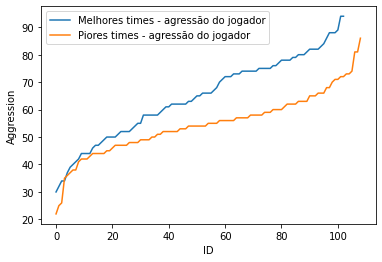

In [24]:
fifa_mp= fifa_mp.sort_values(by = "Aggression")
fifa_pp= fifa_pp.sort_values(by = "Aggression")
fifa_mp["ID"] = range(len(fifa_mp["Name"]))
fifa_pp["ID"] = range(len(fifa_pp["Name"]))
fig4 = sns.lineplot(x = fifa_mp["ID"], y =fifa_mp["Aggression"],label = "Melhores times - agressão do jogador"), sns.lineplot(x = fifa_pp["ID"], y =fifa_pp["Aggression"],label = "Piores times - agressão do jogador")
figura = fig4.get_figure()
figura.savefig("Agressao  .png", dpi = 400)
del fifa_mp["ID"]
del fifa_pp["ID"]

# SEGUNDA ANÁLISE DO FIFA
## Analise Geral por IDADE - ["Wage", "Overall", "Stamina", "Jumping", "Agility", "Weight"]


# SALARIO

        min       max          mean
Age                                
16   1000.0    5000.0   1184.210526
17   1000.0   66000.0   2281.250000
18   1000.0   36000.0   2381.172840
19   1000.0  100000.0   2871.739130
20   1000.0  110000.0   5081.761006
21   1000.0  155000.0   6689.545092
22   1000.0  215000.0   8641.135972
23   1000.0  195000.0   9338.422392
24   1000.0  205000.0  10606.338616
25   1000.0  230000.0  11753.635586
26   1000.0  340000.0  13239.357430
27   1000.0  355000.0  14266.019417
28   1000.0  355000.0  14707.267144
29   1000.0  315000.0  14809.296782
30   1000.0  300000.0  14030.712531
31   1000.0  565000.0  16111.111111
32   1000.0  420000.0  15090.909091
33   1000.0  405000.0  13705.014749
34   1000.0  110000.0  11137.313433
35   1000.0   72000.0   6860.294118
36   1000.0   27000.0   5238.636364
37   1000.0   95000.0   8880.000000
38   1000.0   23000.0   4400.000000
39   1000.0   18000.0   5153.846154
40   1000.0   18000.0   5000.000000
41   3000.0    5000.0   4000

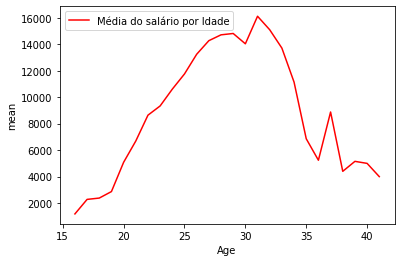

In [18]:
SalarioPorIdade = fifa.groupby('Age').Wage.agg(["min","max","mean"])
print(SalarioPorIdade)
SalarioPorIdade["Age"] = range(16,42)
fig5 = sns.lineplot(x = SalarioPorIdade["Age"] , y =SalarioPorIdade["mean"],label = "Média do salário por Idade", color = "red")
figura = fig5.get_figure()
figura.savefig("Salario_idade.png", dpi = 400)

# NOTA GERAL

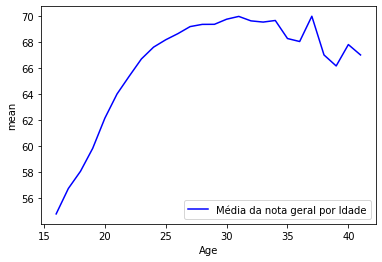

In [19]:
RatingPorIdade = fifa.groupby('Age').Overall.agg(['min','max','mean'])
RatingPorIdade["Age"] = range(16,42)
fig6 = sns.lineplot(x = RatingPorIdade["Age"] , y =RatingPorIdade["mean"],label = "Média da nota geral por Idade", color = "blue" )
figura = fig6.get_figure()
figura.savefig("NotaGeral_idade.png", dpi = 400)

# STAMINA

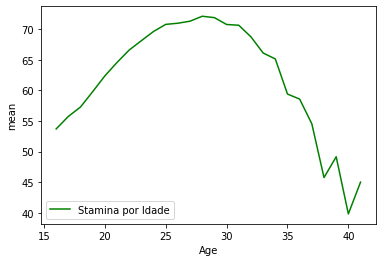

In [20]:
StaminaPorIdade = fifa.groupby('Age').Stamina.agg(['min','max','mean'])
StaminaPorIdade ["Age"] = range(16,42)
fig7 = sns.lineplot(x = StaminaPorIdade ["Age"] , y =StaminaPorIdade ["mean"],label = "Stamina por Idade", color = "green" )
figura = fig7.get_figure()
figura.savefig("Stamina_idade.png", dpi = 400)

# JUMPING - PULO

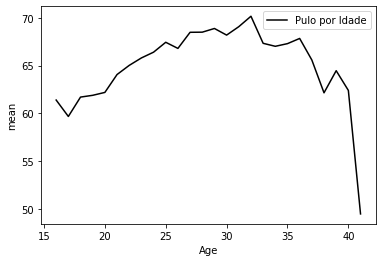

In [21]:
PuloPorIdade = fifa.groupby('Age').Jumping.agg(['min','max','mean'])
PuloPorIdade["Age"] = range(16,42)
fig8 = sns.lineplot(x = PuloPorIdade["Age"] , y =PuloPorIdade["mean"],label = "Pulo por Idade", color = "black" )
figura = fig8.get_figure()
figura.savefig("Pulo_idade.png", dpi = 400)

# AGILITY - AGILIDADE

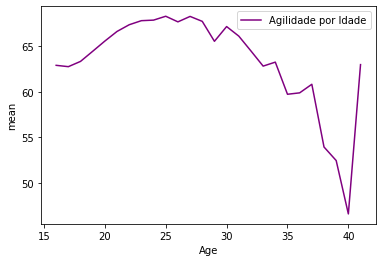

In [22]:
AgilidadePorIdade = fifa.groupby('Age').Agility.agg(['min','max','mean'])
AgilidadePorIdade["Age"] = range(16,42)
fig9 = sns.lineplot(x = AgilidadePorIdade["Age"] , y =AgilidadePorIdade["mean"],label = "Agilidade por Idade", color = "purple" )
figura = fig9.get_figure()
figura.savefig("Agilidade_idade.png", dpi = 400)

# WEIGHT - PESO

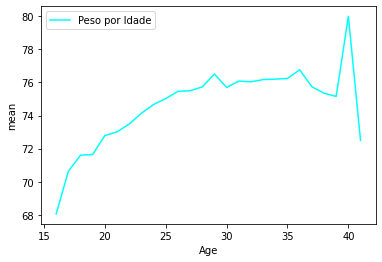

In [23]:
PesoPorIdade = fifa.groupby('Age').Weight.agg(['min','max','mean'])
PesoPorIdade["Age"] = range(16,42)
fig10 =sns.lineplot(x = PesoPorIdade["Age"] , y =PesoPorIdade["mean"],label = "Peso por Idade", color = "cyan" )
figura = fig9.get_figure()
figura.savefig("Peso_idade.png", dpi = 400)